In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\admin\OneDrive\Documents\ai_task_management_dataset.csv")
df.head(5)

,description,priority,assignee,created_at,due_date,status
0,Test how functions behave,Medium,Jennifer Downs,2025-04-20T18:26:31,2025-05-15T18:26:31,Done
1,Add analytics tracking,Medium,Felicia Harris,2025-04-20T07:23:15,2025-05-12T07:23:15,To Do
2,Refactor legacy code,High,Oscar Vaughn,2025-05-04T13:56:39,2025-05-24T13:56:39,Done
3,Optimize performance,High,Jessica Garcia,2025-04-23T03:31:06,2025-04-26T03:31:06,Done
4,Refactor legacy code,Medium,Angela Johnson,2025-04-20T04:07:42,2025-05-20T04:07:42,Done


In [3]:
df.shape

(1000, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  1000 non-null   object
 1   priority     1000 non-null   object
 2   assignee     1000 non-null   object
 3   created_at   1000 non-null   object
 4   due_date     1000 non-null   object
 5   status       1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [5]:
#Finding Missing Values
df.isnull().sum()

description    0
priority       0
assignee       0
created_at     0
due_date       0
status         0
dtype: int64

In [6]:
#convert datetime columns
df['created_at'] = pd.to_datetime(df['created_at'])
df['due_date'] = pd.to_datetime(df['due_date'])

In [7]:
# Calculate task duration in days
df['duration_days'] = (df['due_date'] - df['created_at']).dt.days

In [8]:
df.head(5)

,description,priority,assignee,created_at,due_date,status,duration_days
0,Test how functions behave,Medium,Jennifer Downs,2025-04-20 18:26:31,2025-05-15 18:26:31,Done,25
1,Add analytics tracking,Medium,Felicia Harris,2025-04-20 07:23:15,2025-05-12 07:23:15,To Do,22
2,Refactor legacy code,High,Oscar Vaughn,2025-05-04 13:56:39,2025-05-24 13:56:39,Done,20
3,Optimize performance,High,Jessica Garcia,2025-04-23 03:31:06,2025-04-26 03:31:06,Done,3
4,Refactor legacy code,Medium,Angela Johnson,2025-04-20 04:07:42,2025-05-20 04:07:42,Done,30


<Figure size 200x200 with 0 Axes>

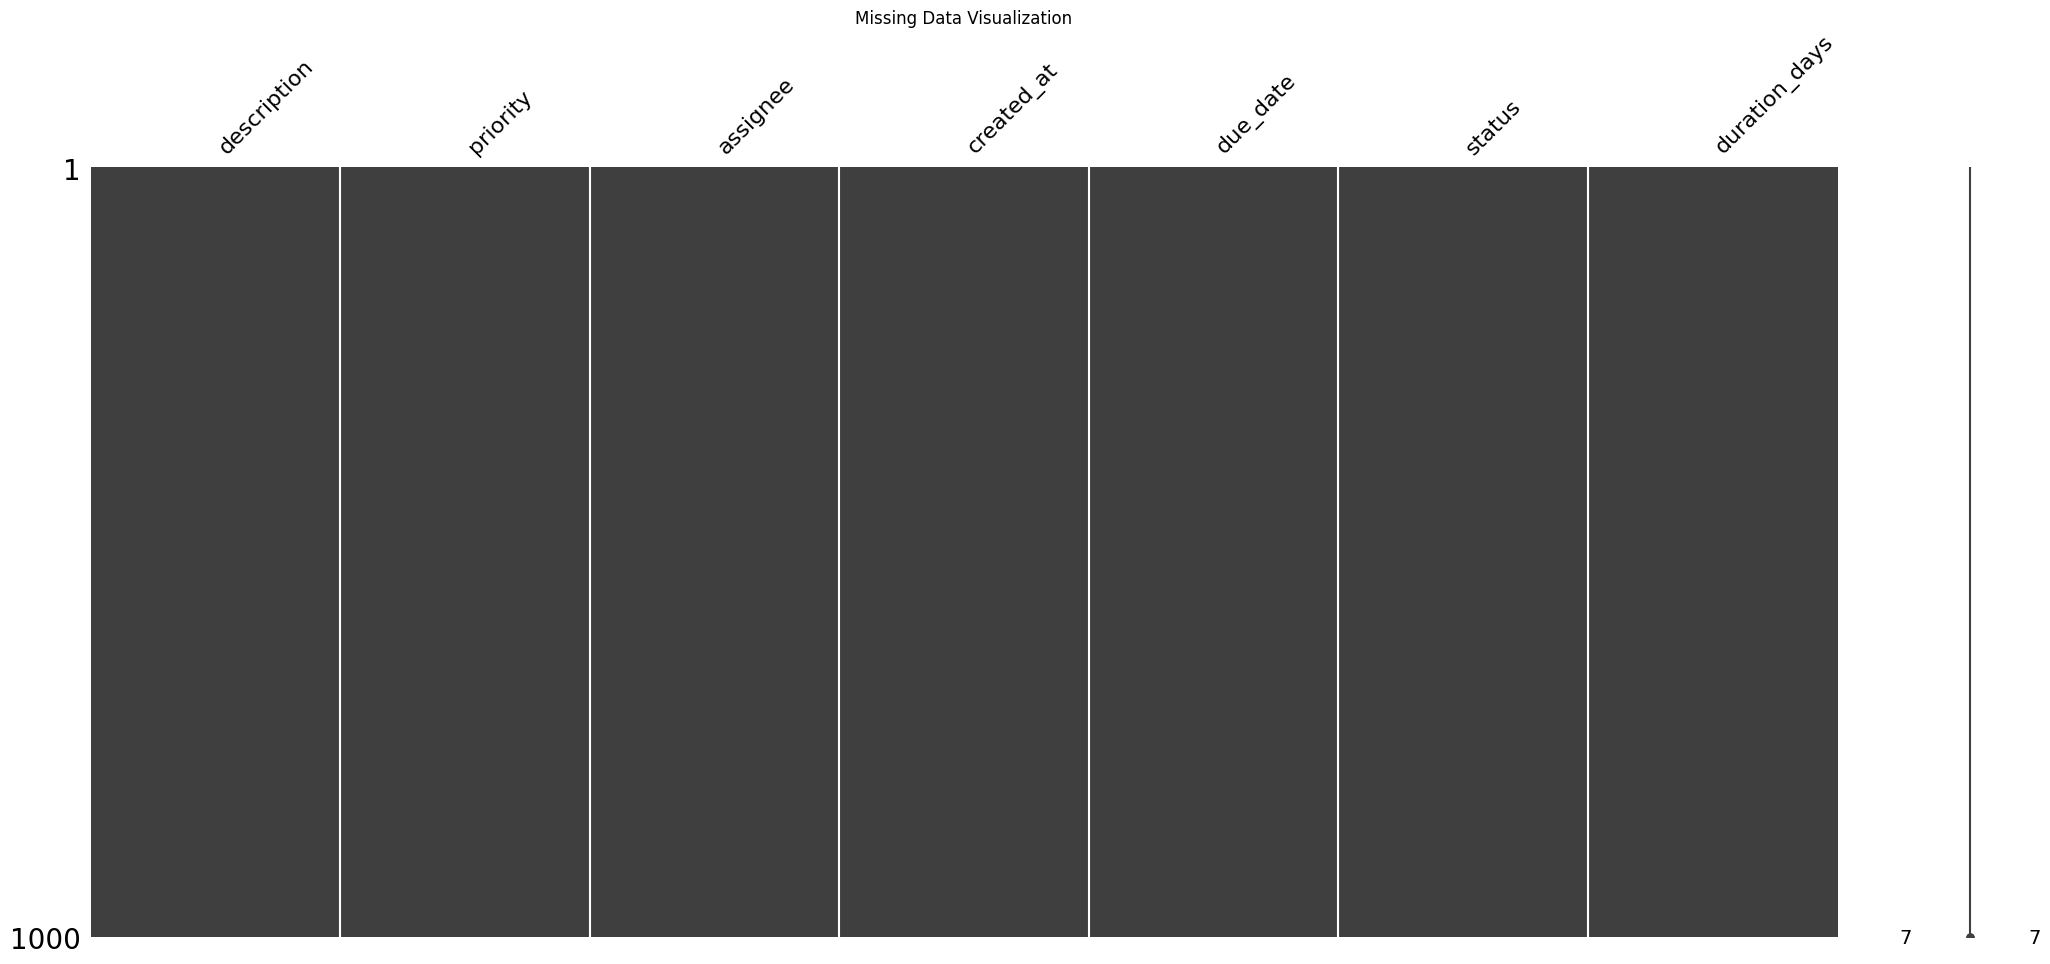

In [9]:
#Visualizing Missing Value
plt.figure(figsize=(2,2))
msno.matrix(df)
plt.title("Missing Data Visualization")
plt.show()

In [10]:
# Show unique values for categorical columns
cat_cols = ['priority', 'status', 'assignee']
for col in cat_cols:
    print(f"\nUnique values in '{col}':", df[col].unique())


Unique values in 'priority': ['Medium' 'High' 'Low']

Unique values in 'status': ['Done' 'To Do' 'In Progress']

Unique values in 'assignee': ['Jennifer Downs' 'Felicia Harris' 'Oscar Vaughn' 'Jessica Garcia'
 'Angela Johnson' 'Christopher Wells' 'Dr. Erika Gray' 'Mr. Michael Mata'
 'Teresa Waters' 'Carlos Garner' 'Sheri Tucker' 'Nancy Barrett'
 'Susan Watson' 'Jane Holt' 'Phillip Campbell' 'Christopher Armstrong'
 'Kelly Jones' 'Eugene Bullock DDS' 'Jeremy White' 'Heather Gould'
 'Tonya Johnson' 'Jesus Hall' 'Casey Hatfield' 'John Edwards'
 'Kimberly Davis' 'Brian Thomas' 'Christina Herman' 'David Simmons'
 'Jessica Guerrero' 'Danielle Richards' 'Tammy Hines' 'Brittany Yu'
 'Emily Williams' 'Nicole Tate' 'Mary Russell' 'William Harris'
 'Holly Klein' 'Antonio Sanders' 'Mason Leonard' 'Jonathan Acosta'
 'Amy Gillespie' 'Daniel Nguyen' 'David Parsons' 'Larry Parker'
 'Judith Burns' 'Ryan Walton' 'Ronnie Hampton' 'Erica Scott'
 'Craig Jensen' 'Audrey Williamson']


In [11]:
# Convert deadline to datetime
df['due_date'] = pd.to_datetime(df['due_date'], errors='coerce')

In [12]:
# Drop rows where essential info is missing
df.dropna(subset=['description', 'due_date', 'priority'], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_2480\4170258227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='priority', order=df['priority'].value_counts().index, palette="bright")
C:\Users\admin\AppData\Local\Temp\ipykernel_2480\4170258227.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bx = sns.countplot(data=df, x='status', order=df['status'].value_counts().index, palette="viridis")
C:\Users\admin\AppData\Local\Temp\ipykernel_2480\4170258227.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cx = sns.barplot(x=top_assignees.index, y=

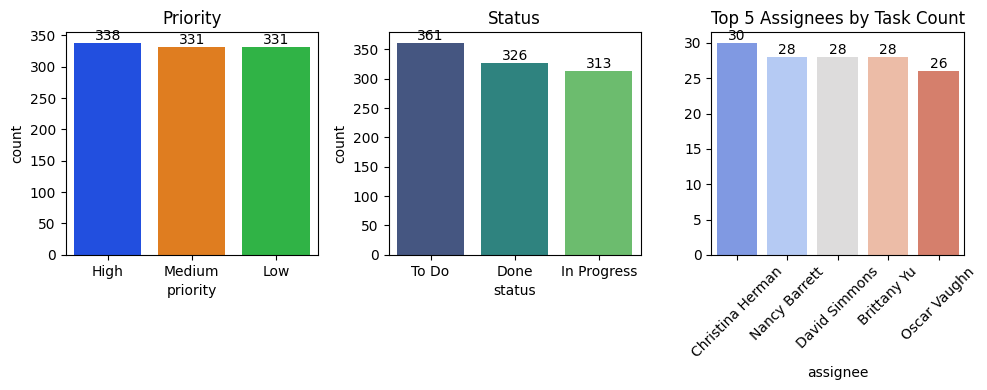

In [13]:
# Univariate Categorical Analysis
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
ax = sns.countplot(data=df, x='priority', order=df['priority'].value_counts().index, palette="bright")
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Priority')

plt.subplot(1, 3, 2)
bx = sns.countplot(data=df, x='status', order=df['status'].value_counts().index, palette="viridis")
for i in bx.containers:
    bx.bar_label(i,)
plt.title('Status')

plt.subplot(1, 3, 3)
top_assignees = df['assignee'].value_counts().nlargest(5)
cx = sns.barplot(x=top_assignees.index, y=top_assignees.values, palette="coolwarm")
for i in cx.containers:
    cx.bar_label(i,)
plt.title('Top 5 Assignees by Task Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

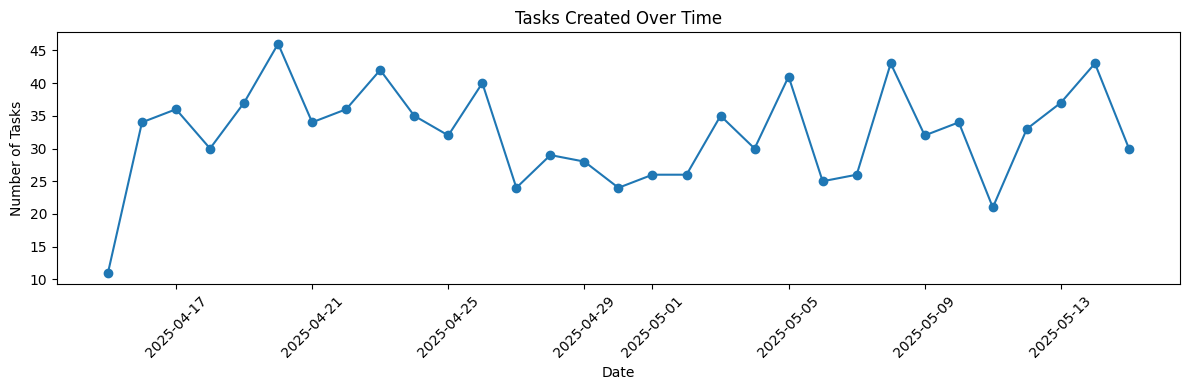

In [14]:
# Time Series: Tasks Created Over Time
df['created_date'] = df['created_at'].dt.date
tasks_per_day = df['created_date'].value_counts().sort_index()

plt.figure(figsize=(12, 4))
tasks_per_day.plot(kind='line', marker='o')
plt.title('Tasks Created Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tasks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

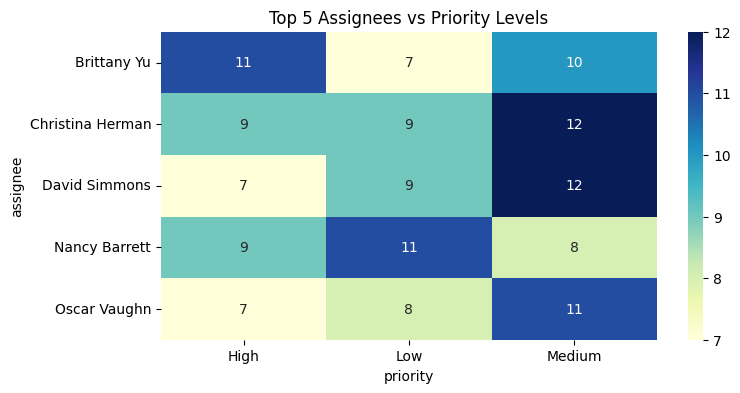

In [15]:
# Heatmap: Assignee vs Priority
top_assignees_list = top_assignees.index.tolist()
pivot = df[df['assignee'].isin(top_assignees_list)].pivot_table(
    index='assignee', columns='priority', aggfunc='size', fill_value=0
)

plt.figure(figsize=(8, 4))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Top 5 Assignees vs Priority Levels')
plt.show()

In [16]:
# Encode for correlation
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
for col in ['priority', 'status', 'assignee']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

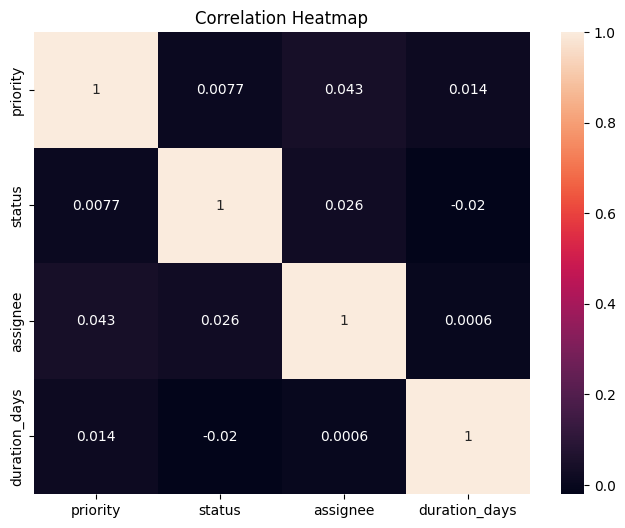

In [17]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[['priority', 'status', 'assignee', 'duration_days']].corr(), annot=True, )
plt.title('Correlation Heatmap')
plt.show()

In [18]:
df.head(5)

,description,priority,assignee,created_at,due_date,status,duration_days,created_date
0,Test how functions behave,Medium,Jennifer Downs,2025-04-20 18:26:31,2025-05-15 18:26:31,Done,25,2025-04-20
1,Add analytics tracking,Medium,Felicia Harris,2025-04-20 07:23:15,2025-05-12 07:23:15,To Do,22,2025-04-20
2,Refactor legacy code,High,Oscar Vaughn,2025-05-04 13:56:39,2025-05-24 13:56:39,Done,20,2025-05-04
3,Optimize performance,High,Jessica Garcia,2025-04-23 03:31:06,2025-04-26 03:31:06,Done,3,2025-04-23
4,Refactor legacy code,Medium,Angela Johnson,2025-04-20 04:07:42,2025-05-20 04:07:42,Done,30,2025-04-20


with the help of EDA we find -
1. No missing values the dataset have.
2. Task duration : 
    Avg duration :- 15.6 day,
    minimum :- 1 day,
    maximum :- 30 days
3. priority of task :
    High :- 338,
    medium :- 331,
    Low :- 331
4. status of Task :
    To Do :- 361,
    In Progress :- 326,
    Done :- 313
5. top 5 highest task assinee
6. Plot to see task created over time
7. heatmap for priority task assigned to the assignees

In [19]:
# NLP Preprocessing
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def preprocess_text(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    return ' '.join([stemmer.stem(word) for word in tokens if word not in ENGLISH_STOP_WORDS])

df['processed_text'] = df['description'].apply(preprocess_text)

In [20]:
df.head()

,description,priority,assignee,created_at,due_date,status,duration_days,created_date,processed_text
0,Test how functions behave,Medium,Jennifer Downs,2025-04-20 18:26:31,2025-05-15 18:26:31,Done,25,2025-04-20,test function behav
1,Add analytics tracking,Medium,Felicia Harris,2025-04-20 07:23:15,2025-05-12 07:23:15,To Do,22,2025-04-20,add analyt track
2,Refactor legacy code,High,Oscar Vaughn,2025-05-04 13:56:39,2025-05-24 13:56:39,Done,20,2025-05-04,refactor legaci code
3,Optimize performance,High,Jessica Garcia,2025-04-23 03:31:06,2025-04-26 03:31:06,Done,3,2025-04-23,optim perform
4,Refactor legacy code,Medium,Angela Johnson,2025-04-20 04:07:42,2025-05-20 04:07:42,Done,30,2025-04-20,refactor legaci code


In [21]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [22]:
# Initialize tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [23]:
def preprocess_text(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    return ' '.join([stemmer.stem(word) for word in tokens if word not in ENGLISH_STOP_WORDS])

In [24]:
# Apply preprocessing
df["cleaned_description"]=df['description'].apply(preprocess_text)


In [25]:
df.head()

,description,priority,assignee,created_at,due_date,status,duration_days,created_date,processed_text,cleaned_description
0,Test how functions behave,Medium,Jennifer Downs,2025-04-20 18:26:31,2025-05-15 18:26:31,Done,25,2025-04-20,test function behav,test function behav
1,Add analytics tracking,Medium,Felicia Harris,2025-04-20 07:23:15,2025-05-12 07:23:15,To Do,22,2025-04-20,add analyt track,add analyt track
2,Refactor legacy code,High,Oscar Vaughn,2025-05-04 13:56:39,2025-05-24 13:56:39,Done,20,2025-05-04,refactor legaci code,refactor legaci code
3,Optimize performance,High,Jessica Garcia,2025-04-23 03:31:06,2025-04-26 03:31:06,Done,3,2025-04-23,optim perform,optim perform
4,Refactor legacy code,Medium,Angela Johnson,2025-04-20 04:07:42,2025-05-20 04:07:42,Done,30,2025-04-20,refactor legaci code,refactor legaci code


In [26]:
#feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(df['cleaned_description'])

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [28]:
X = X_tfidf
y = df["priority"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# ---- Naive Bayes ----
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

In [31]:
print("\nNaive Bayes Classification Report :")
print(classification_report(y_test, nb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_preds))


Naive Bayes Classification Report :
              precision    recall  f1-score   support

        High       0.49      0.47      0.48        72
         Low       0.43      0.43      0.43        54
      Medium       0.42      0.43      0.42        74

    accuracy                           0.45       200
   macro avg       0.45      0.44      0.44       200
weighted avg       0.45      0.45      0.45       200

Confusion Matrix:
 [[34 12 26]
 [12 23 19]
 [24 18 32]]


In [32]:
# SVM 
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

In [33]:
print("\nSVM Classification Report :")
print(classification_report(y_test, svm_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_preds))



SVM Classification Report :
              precision    recall  f1-score   support

        High       0.51      0.36      0.42        72
         Low       0.33      0.61      0.43        54
      Medium       0.42      0.28      0.34        74

    accuracy                           0.40       200
   macro avg       0.42      0.42      0.40       200
weighted avg       0.43      0.40      0.39       200

Confusion Matrix:
 [[26 28 18]
 [10 33 11]
 [15 38 21]]


In [34]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [35]:
# Encode target labels (priority)
priority_encoder = LabelEncoder()
df['priority_encoded'] = priority_encoder.fit_transform(df['priority'])

In [36]:
# Features and labels
X = X_tfidf
y = df['priority_encoded']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# ---- Random Forest ----
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [39]:
print("\n=== Random Forest Classification Report ===")
print(classification_report(y_test, rf_preds, target_names=priority_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, rf_preds))


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

        High       0.49      0.47      0.48        72
         Low       0.39      0.57      0.46        54
      Medium       0.42      0.28      0.34        74

    accuracy                           0.43       200
   macro avg       0.43      0.44      0.43       200
weighted avg       0.43      0.43      0.42       200

Accuracy: 0.43


In [40]:
# ---- XGBoost ----
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:53:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [41]:
print("\n=== XGBoost Classification Report ===")
print(classification_report(y_test, xgb_preds, target_names=priority_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, xgb_preds))


=== XGBoost Classification Report ===
              precision    recall  f1-score   support

        High       0.51      0.36      0.42        72
         Low       0.33      0.61      0.43        54
      Medium       0.42      0.28      0.34        74

    accuracy                           0.40       200
   macro avg       0.42      0.42      0.40       200
weighted avg       0.43      0.40      0.39       200

Accuracy: 0.4


In [42]:
from collections import defaultdict
user_workload = defaultdict(int)
df_sorted = df.sort_values(by=['priority_encoded', 'due_date'], ascending=[False, True])
user_list = df['assignee'].dropna().unique().tolist()

In [43]:
if not user_list:
    user_list = ['User1', 'User2', 'User3']

# Assign tasks based on least workload
assignments = []
for _, row in df_sorted.iterrows():
    least_loaded_user = min(user_list, key=lambda u: user_workload[u])
    assignments.append(least_loaded_user)
    user_workload[least_loaded_user] += 1


In [44]:
df_sorted['new_assignment'] = assignments
print("Sample Workload Assignments:\n")
print(df_sorted[['description', 'priority', 'due_date', 'new_assignment']].head(10))

Sample Workload Assignments:

                   description priority            due_date     new_assignment
48         Write documentation   Medium 2025-04-19 22:59:46     Jennifer Downs
222  Test how functions behave   Medium 2025-04-21 13:08:08     Felicia Harris
76        Refactor legacy code   Medium 2025-04-21 20:16:20       Oscar Vaughn
666         Fix bugs in module   Medium 2025-04-22 06:46:00     Jessica Garcia
804         Fix bugs in module   Medium 2025-04-22 10:21:02     Angela Johnson
266       Optimize performance   Medium 2025-04-22 11:24:58  Christopher Wells
259  Test how functions behave   Medium 2025-04-23 02:10:53     Dr. Erika Gray
574         Fix bugs in module   Medium 2025-04-23 10:58:03   Mr. Michael Mata
716         Fix bugs in module   Medium 2025-04-23 13:51:29      Teresa Waters
868         Fix bugs in module   Medium 2025-04-23 20:35:27      Carlos Garner


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Define parameter grid
svm_params = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [1000, 2000]
}

# Initialize model
svm = LinearSVC()

# Grid search
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='f1_weighted')
svm_grid.fit(X_train, y_train)

# Best parameters and score
print("Best SVM Params:", svm_grid.best_params_)
print("Best SVM F1 Score:", svm_grid.best_score_)


Best SVM Params: {'C': 0.1, 'max_iter': 1000}
Best SVM F1 Score: 0.33104434127248317


In [46]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

rf = RandomForestClassifier(random_state=42)

# Grid search
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1_weighted')
rf_grid.fit(X_train, y_train)

print("Best RF Params:", rf_grid.best_params_)
print("Best RF F1 Score:", rf_grid.best_score_)


Best RF Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best RF F1 Score: 0.32844361438157726


In [48]:
# Example: save best models
import joblib
joblib.dump(svm_grid.best_estimator_, 'models/final_svm_model.pkl')
joblib.dump(rf_grid.best_estimator_, 'models/final_rf_model.pkl')
joblib.dump(xgb, 'models/final_xgb_model.pkl')  # from Part 5


['models/final_xgb_model.pkl']

In [49]:
joblib.dump(tfidf, 'models/tfidf_vectorizer.pkl')

['models/tfidf_vectorizer.pkl']

In [58]:
joblib.dump(priority_encoder, 'models/priority_label_encoder.pkl')

['models/priority_label_encoder.pkl']

In [61]:
task_label_encoder = LabelEncoder()
y_task_encoded = task_label_encoder.fit_transform(df['processed_text'])


# Save them for later use
joblib.dump(task_label_encoder, 'models/task_label_encoder.pkl')


['models/task_label_encoder.pkl']

In [62]:
svm_model = joblib.load('models/final_svm_model.pkl')
rf_model = joblib.load('models/final_rf_model.pkl')
tfidf = joblib.load('models/tfidf_vectorizer.pkl')
priority_encoder = joblib.load('models/priority_label_encoder.pkl')

In [63]:
# ---- Classification Report Visualization ----
from sklearn.metrics import classification_report, confusion_matrix

# Task Classification report (example)
y_pred = svm_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()


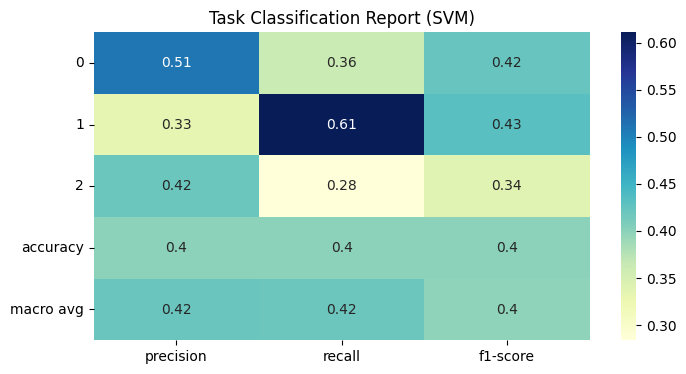

In [64]:
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Task Classification Report (SVM)")
plt.show()


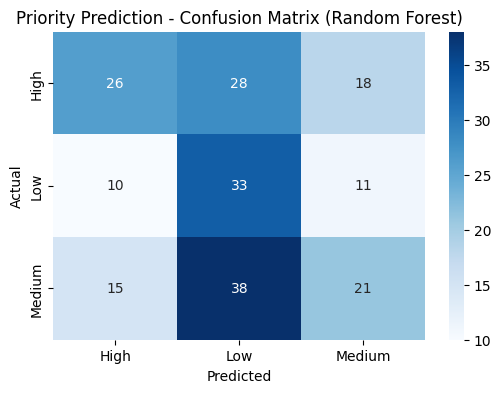

In [65]:
# ---- Priority Prediction: Confusion Matrix ----
y_pred_rf = rf_model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues",
            xticklabels=priority_encoder.classes_,
            yticklabels=priority_encoder.classes_)
plt.title("Priority Prediction - Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

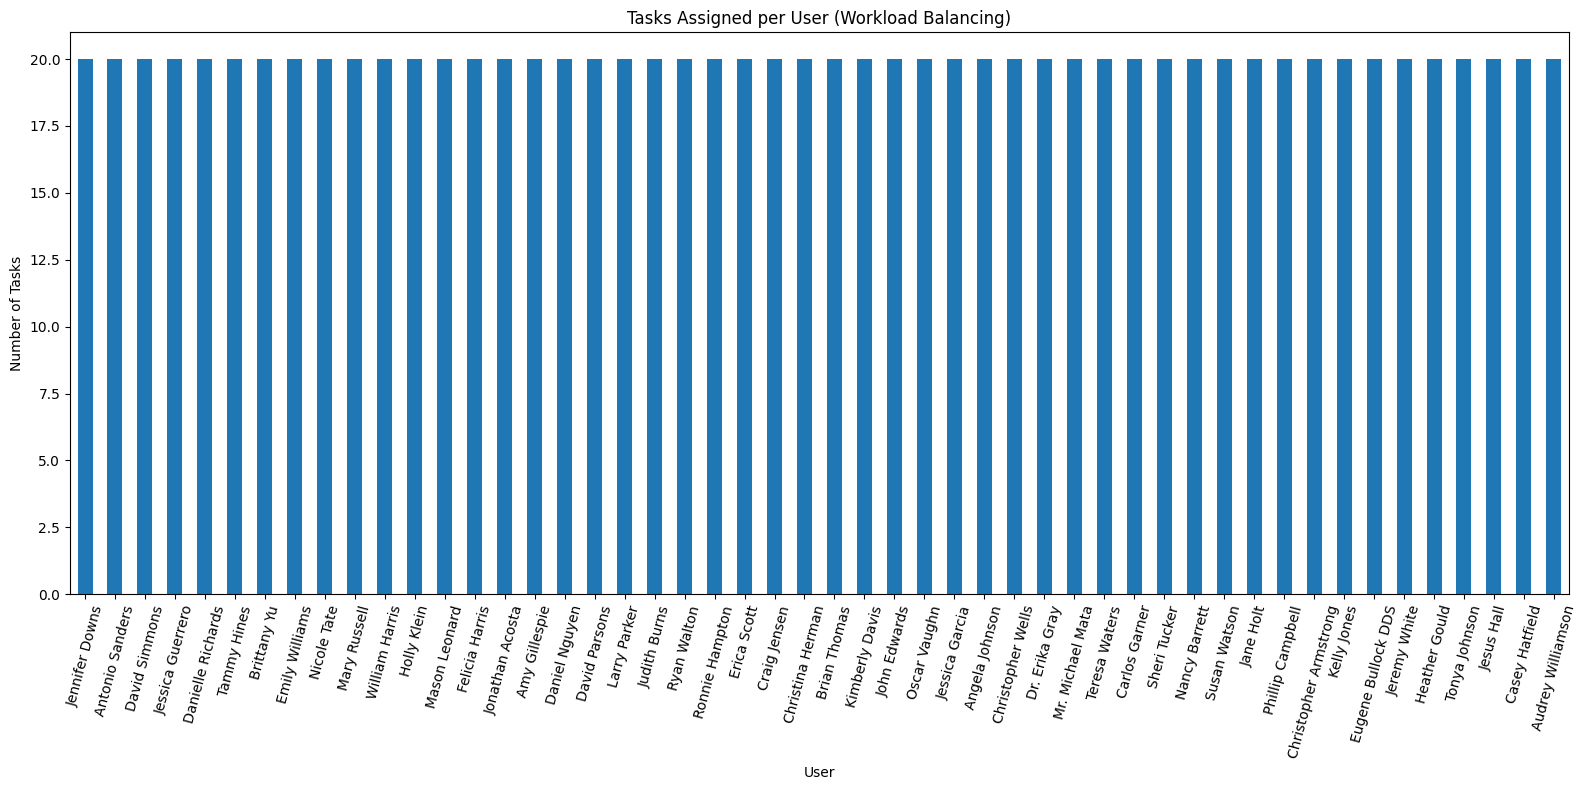

In [66]:
# ---- Workload Distribution ----
plt.figure(figsize=(16, 8))
df_sorted['new_assignment'].value_counts().plot(kind='bar')
plt.title("Tasks Assigned per User (Workload Balancing)")
plt.ylabel("Number of Tasks")
plt.xlabel("User")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()
